# 0. Imports and downloading the Data Frame

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

### 0.1. Wyczytanie pliku csv z mojego repo

In [2]:
!curl -OL https://git.wmi.amu.edu.pl/s434788/ium_434788/raw/branch/master/winequality-red.csv

wine=pd.read_csv('winequality-red.csv')
wine

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   98k  100   98k    0     0  66899      0  0:00:01  0:00:01 --:--:-- 66899


fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

# 1. Analiza zbioru

### 1.1. Heatmap by zbada korelacje. Z początku zastanawiałem się, czy nie wykorzystać tylko kolumn wysoko skorelowanych z 'Quality', jednak koniec końców model będzie się opierać o wszystkie kolumny

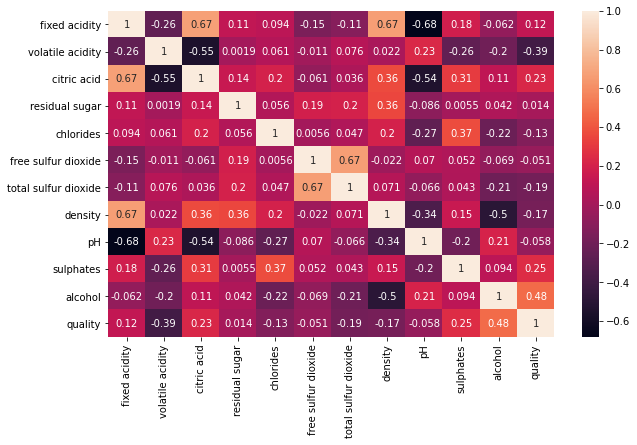

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(wine.corr(),annot=True)
plt.show()

# 2. Normalizacja i podział zbioru na Test/Train

### 2.1. 'y' to pojedyńcza kolumna z wartościami 'quality'

In [4]:
y = wine.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### 2.2. 'x' to wszystkie kolumny poza 'quality'

In [5]:
x = wine.drop(['quality'], axis= 1)
x.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]

### 2.3. Normalizacja wartości w x (do przedziału 0-1)

In [6]:
x=((x-x.min())/(x.max()-x.min()))
x.head()

fixed acidity  volatile acidity  citric acid  ...        pH  sulphates   alcohol
0       0.247788          0.397260         0.00  ...  0.606299   0.137725  0.153846
1       0.283186          0.520548         0.00  ...  0.362205   0.209581  0.215385
2       0.283186          0.438356         0.04  ...  0.409449   0.191617  0.215385
3       0.584071          0.109589         0.56  ...  0.330709   0.149701  0.215385
4       0.247788          0.397260         0.00  ...  0.606299   0.137725  0.153846

[5 rows x 11 columns]

### 2.4. Podział na zbiory testowe i treningowe (1:4)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,train_size=0.8, random_state=21)

In [8]:
x_train.head()

fixed acidity  volatile acidity  ...  sulphates   alcohol
751       0.327434          0.363014  ...   0.131737  0.169231
370       0.203540          0.441781  ...   0.269461  0.230769
374       0.831858          0.198630  ...   0.287425  0.369231
537       0.309735          0.482877  ...   0.263473  0.353846
708       0.283186          0.291096  ...   0.167665  0.492308

[5 rows x 11 columns]

# 3. Model i jego trening (Tensorflow.Keras)

In [9]:
def regression_model():
    model = Sequential()
    model.add(Dense(32,activation = "relu", input_shape = (x_train.shape[1],)))
    model.add(Dense(64,activation = "relu"))
    model.add(Dense(1,activation = "relu"))
    
    model.compile(optimizer = "adam", loss = "mean_squared_error")
    return model

In [10]:
model = regression_model()

In [11]:
model.fit(x_train, y_train, epochs = 600, verbose = 1)

Epoch 1/600
40/40 [==============================] - 1s 1ms/step - loss: 27.8321
Epoch 2/600
40/40 [==============================] - 0s 1ms/step - loss: 7.2309
Epoch 3/600
40/40 [==============================] - 0s 1ms/step - loss: 1.0122
Epoch 4/600
40/40 [==============================] - 0s 1ms/step - loss: 0.8249
Epoch 5/600
40/40 [==============================] - 0s 1ms/step - loss: 0.8217
Epoch 6/600
40/40 [==============================] - 0s 1ms/step - loss: 0.7261
Epoch 7/600
40/40 [==============================] - 0s 2ms/step - loss: 0.6524
Epoch 8/600
40/40 [==============================] - 0s 1ms/step - loss: 0.6332
Epoch 9/600
40/40 [==============================] - 0s 1ms/step - loss: 0.6085
Epoch 10/600
40/40 [==============================] - 0s 2ms/step - loss: 0.5933
Epoch 11/600
40/40 [==============================] - 0s 2ms/step - loss: 0.5950
Epoch 12/600
40/40 [==============================] - 0s 1ms/step - loss: 0.6067
Epoch 13/600
40/40 [================

# 4. Predykcje, Pokrycie, Precyzja i F-Score (+ Zapisanie y_pred)

In [12]:
y_pred = model.predict(x_test)

y_pred[:5]

array([[5.852079 ],
       [5.9662743],
       [5.219407 ],
       [5.5860786],
       [6.314252 ]], dtype=float32)

In [18]:
y_pred = np.around(y_pred, decimals=0)

y_pred[:5]

pd.DataFrame(y_pred).to_csv("preds.csv")

In [ ]:
accuracy_score(y_test, y_pred)

0.603125

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         6
         5.0       0.75      0.62      0.68       152
         6.0       0.49      0.70      0.58       115
         7.0       0.66      0.47      0.55        40
         8.0       0.00      0.00      0.00         6

    accuracy                           0.60       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.61      0.60      0.60       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
